In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
mean_total_bedrooms = data['total_bedrooms'].mean()

data['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
unique_ocean_proximity = data['ocean_proximity'].unique()
unique_ocean_proximity
data = pd.get_dummies(data, columns=['ocean_proximity'])

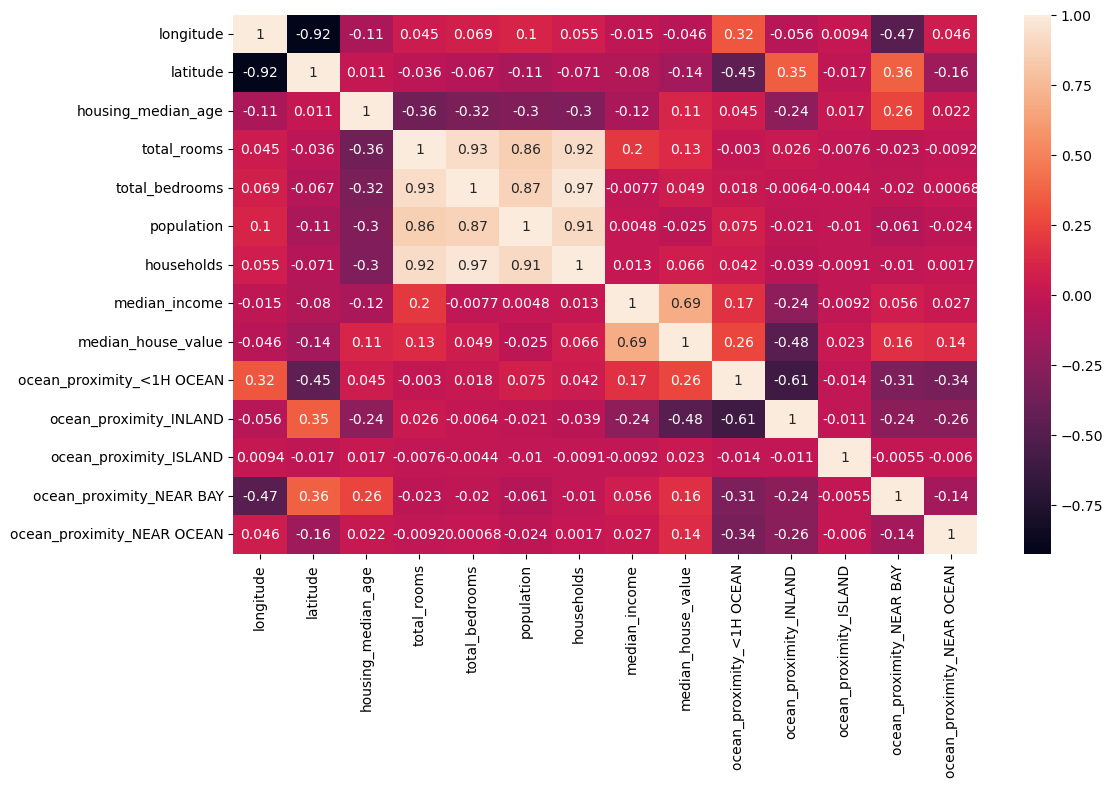

In [7]:
import seaborn as sns
import pandas as pd
cor_data = data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(cor_data, annot=True)
plt.show()

In [8]:
x = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

In [11]:
Y = pd.DataFrame(X)
Y

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.0,1.0,0.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.0,1.0,0.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.0,1.0,0.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.0,1.0,0.0,0.0,0.0


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
x_train.shape,y_train.shape

((16512, 13), (16512,))

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
ran = RandomForestRegressor(n_estimators=30)
dec = DecisionTreeRegressor()
reg = LinearRegression()
models = {
    "Liner Regression":reg,
    "RandomForest": ran,
    "DesisionTree": dec,
    "LinearRegression" : reg,
    "KNN": KNeighborsRegressor(),
    "L1 Regularisation": linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
}

In [16]:
scores = []
threshold = 0.3
for name, var in models.items():
    var.fit(x_train, y_train)
    y_predict = var.predict(x_test)
    y_pred = var.predict(x_test)
    
    scores.append({
        "Model_name": name,
        "Train Acuracy":var.score(x_train,y_train),
        "Test Accuracy": var.score(x_test, y_test), 
        "MSE" : mean_squared_error(y_test, y_predict),
        "MAE" : mean_absolute_error(y_test, y_predict),
        "R2" : r2_score(y_test, y_predict),
        "Thresold accuracy":sum(abs(y_pred - y_test) / y_test < threshold) / len(y_test)
        
    })
df1 = pd.DataFrame(scores)
df1

,Model_name,Train Acuracy,Test Accuracy,MSE,MAE,R2,Thresold accuracy
0,Liner Regression,0.645382,0.645333,4.620234e+09,49685.470699,0.645333,0.654070
1,RandomForest,0.972466,0.817639,2.375618e+09,31862.637863,0.817639,0.843266
2,DesisionTree,1.000000,0.635078,4.753834e+09,43314.869186,0.635078,0.750484
3,LinearRegression,0.645382,0.645333,4.620234e+09,49685.470699,0.645333,0.654070
4,KNN,0.808634,0.710488,3.771465e+09,41314.890068,0.710488,0.756056
5,L1 Regularisation,0.640212,0.640407,4.684413e+09,49922.108632,0.640407,0.647771


In [17]:
predictions = ran.predict(x_test[:3])
actuals = y_test[:3].values
predictions,actuals

(array([165106.66666667, 371960.26666667, 103540.        ]),
 array([148700., 312500.,  93400.]))

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X, y)


importances = model.feature_importances_

# Create a DataFrame to view the feature importances
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                       Feature  Importance
7                median_income    0.482625
9       ocean_proximity_INLAND    0.143708
0                    longitude    0.110975
1                     latitude    0.105462
2           housing_median_age    0.051000
5                   population    0.030494
3                  total_rooms    0.024342
4               total_bedrooms    0.021159
6                   households    0.018829
12  ocean_proximity_NEAR OCEAN    0.006393
8    ocean_proximity_<1H OCEAN    0.003598
11    ocean_proximity_NEAR BAY    0.001040
10      ocean_proximity_ISLAND    0.000373


In [34]:
ran.score(x_test,y_test)

0.8165888676373602